## Import Torch

In [1]:
### Main torch library
import torch
### For Neural Network
import torch.nn as nn

In [2]:
### You can find dataset there
from torch.utils import data
from torchvision import datasets

## Example Matrix Multiplication

In [3]:
A = torch.randn(4,4)
A

tensor([[ 0.1823, -0.1864, -1.5830, -0.2532],
        [ 1.7456,  0.0064,  0.5646,  0.4628],
        [-0.3011,  0.1822, -0.9295,  0.7538],
        [ 0.6005, -0.1963, -0.1070, -2.1512]])

In [4]:
B = torch.randn(4, 3)
B

tensor([[-1.1660,  0.1597, -0.8276],
        [ 0.8261, -0.2000, -1.4585],
        [ 0.2002,  1.2404,  1.1246],
        [ 0.6597, -0.5062,  1.4632]])

In [5]:
C = torch.matmul(A, B)
C

tensor([[-0.8505, -1.7690, -2.0297],
        [-1.6117,  0.7436, -0.1419],
        [ 0.8127, -1.6191,  0.0409],
        [-2.3028,  1.0914, -3.4786]])

In [6]:
C.shape

torch.Size([4, 3])

## Load Dataset

In [7]:
from torchvision import transforms
to_tensor = transforms.ToTensor()

In [8]:
train_data = datasets.MNIST(root="./datasets", train=True, download=True, transform=to_tensor)

In [9]:
test_data = datasets.MNIST(root="./datasets", train=False, download=True, transform=to_tensor)

In [10]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [11]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [12]:
import matplotlib.pyplot as plt

(<matplotlib.image.AxesImage at 0x12716ba10>, tensor(5))

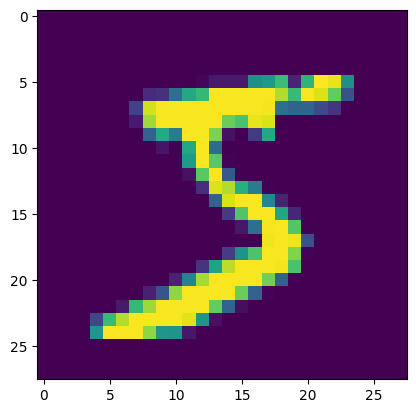

In [13]:
plt.imshow(train_data.data[0]), train_data.targets[0]

In [14]:
train_data_loader = data.DataLoader(train_data, shuffle=True, batch_size=32)
test_data_loader = data.DataLoader(test_data, shuffle=True, batch_size=32)

In [15]:
for inputs, label in train_data_loader:
    print(inputs.shape)
    print(inputs.reshape(32, 784).shape)
    break

torch.Size([32, 1, 28, 28])
torch.Size([32, 784])


In [16]:
model = nn.Sequential(
    nn.Linear(28*28, 500),
    nn.ReLU(),
    nn.Linear(500, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

In [17]:
model

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=10, bias=True)
)

In [18]:
for inputs, label in test_data_loader:
    bs = inputs.shape[0]
    
    inputs = inputs.reshape(bs, 28*28)
    outputs = model(inputs)
    out = torch.argmax(outputs, dim=1)
    print("Outputs")
    print(out)
    print("Targets")
    print(label)
    break

Outputs
tensor([1, 6, 1, 6, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 1, 6, 2, 2, 2, 2, 2, 1, 1,
        1, 2, 2, 6, 2, 6, 6, 1])
Targets
tensor([1, 7, 0, 1, 5, 1, 0, 4, 7, 4, 1, 8, 9, 7, 0, 1, 0, 5, 5, 7, 3, 7, 8, 3,
        2, 2, 2, 4, 7, 4, 7, 4])


## Optimizer

In [19]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
error_function = nn.CrossEntropyLoss()

## Training Loop

In [20]:
# train_loss = []
# test_loss = []
# train_accuracy = []
test_accuracy = []
EPOCHS = 50

In [21]:
### Find accuracy of Test Dataset
count = 0
accuracy = 0
for inputs, label in test_data_loader:
    ### change shape of input
    bs = inputs.shape[0]
    inputs = inputs.reshape(bs, 28*28)

    ### predict the output
    outputs = model(inputs)
    out = torch.argmax(outputs, dim=1)

    accuracy += (out == label).type(torch.float).sum()
    count += bs
test_accuracy.append(accuracy/count)

In [22]:
test_accuracy

[tensor(0.1203)]

In [23]:
for epoch in range(EPOCHS):
    print("Training EPOCH", epoch)
    for inputs, label in train_data_loader:
        ### change shape of input
        bs = inputs.shape[0]
        inputs = inputs.reshape(bs, 28*28)

        ### predict the output
        outputs = model(inputs)

        ### find the error
        error = error_function(outputs, label)

        ### backpropagate
        optimizer.zero_grad()
        error.backward()
        optimizer.step()
    
    ### Find accuracy of Test Dataset
    count = 0
    accuracy = 0
    for inputs, label in test_data_loader:
        ### change shape of input
        bs = inputs.shape[0]
        inputs = inputs.reshape(bs, 28*28)

        ### predict the output
        outputs = model(inputs)
        out = torch.argmax(outputs, dim=1)
        
        accuracy += (out == label).type(torch.float).sum()
        count += bs
    test_accuracy.append(accuracy/count)
    plt.plot(test_accuracy)
    
    
#     print("Outputs")
#     print(out)
#     print("Targets")
#     print(label)
#     break

Training EPOCH 0
Training EPOCH 1
Training EPOCH 2
Training EPOCH 3
Training EPOCH 4
Training EPOCH 5
Training EPOCH 6
Training EPOCH 7
Training EPOCH 8
Training EPOCH 9
Training EPOCH 10
Training EPOCH 11
Training EPOCH 12
Training EPOCH 13
Training EPOCH 14
Training EPOCH 15
Training EPOCH 16
Training EPOCH 17
Training EPOCH 18
Training EPOCH 19
Training EPOCH 20
Training EPOCH 21
Training EPOCH 22
Training EPOCH 23
Training EPOCH 24
Training EPOCH 25
Training EPOCH 26
Training EPOCH 27
Training EPOCH 28
Training EPOCH 29
Training EPOCH 30
Training EPOCH 31
Training EPOCH 32
Training EPOCH 33
Training EPOCH 34
Training EPOCH 35
Training EPOCH 36
Training EPOCH 37
Training EPOCH 38


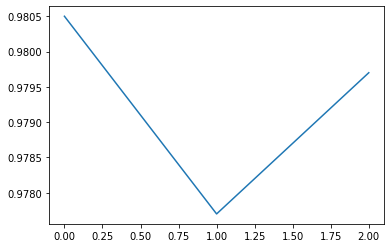

In [ ]:
plt.plot(test_accuracy)

In [ ]:
test_accuracy

[tensor(0.0707),
 tensor(0.9683),
 tensor(0.9757),
 tensor(0.9753),
 tensor(0.9801)]